In [1]:
#Homework 1 for CSCI 5461
#Matthew Markman

In [2]:
import pandas as pd
import matplotlib.pyplot
import numpy as np

In [3]:
hw_data = pd.read_csv('/Users/MacProMatt/Desktop/algorithms-school_work/CSCI 5461/HW1/wang_data.txt', sep='\t')

In [4]:
df = pd.DataFrame(hw_data)
df = df.rename({'Unnamed: 0': "Probe"}, axis = 1)
df

,Probe,Gene,GSM36777,GSM36778,GSM36779,GSM36780,GSM36781,GSM36782,GSM36783,GSM36784,...,GSM37053,GSM37054,GSM37055,GSM37056,GSM37057,GSM37058,GSM37059,GSM37060,GSM37061,GSM37062
0,Relapse,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1007_s_at,DDR1,3848.1,6520.9,5285.7,4043.7,4263.6,2949.8,5498.9,3863.1,...,4058.2,4017.6,2841.0,2914.2,3681.0,3066.9,2773.0,2984.3,3540.0,2620.0
2,1053_at,RFC2,228.9,112.5,178.4,398.7,417.7,221.2,280.4,198.2,...,183.4,356.1,234.6,169.4,94.5,265.5,209.8,160.0,285.7,180.5
3,117_at,HSPA6,213.1,189.8,269.7,312.4,327.1,225.0,243.5,244.4,...,326.6,234.9,369.6,149.5,236.4,347.9,226.7,252.9,135.1,191.8
4,121_at,PAX8,1009.4,2083.3,1203.4,1104.4,1043.3,1117.6,1085.4,1423.1,...,1041.3,1195.6,751.5,1117.8,1022.4,1127.4,1071.8,1178.5,1256.7,1284.6
5,1255_g_at,GUCA1A,31.8,145.8,42.5,108.2,69.2,47.4,84.3,102.0,...,143.5,32.7,62.6,43.0,100.5,47.0,45.1,146.3,75.9,87.4
6,1294_at,UBA7,551.5,802.8,557.5,568.5,653.2,585.0,553.2,711.1,...,537.5,374.8,431.4,848.5,527.3,583.9,859.9,664.2,603.1,316.2
7,1316_at,THRA,176.7,278.4,183.3,187.7,185.8,166.6,92.5,259.3,...,347.1,270.8,281.7,286.9,167.4,138.2,121.0,183.3,125.0,177.0
8,1320_at,PTPN21,11.9,28.3,56.4,42.1,21.8,21.4,77.3,52.9,...,81.7,72.3,19.2,29.0,55.1,16.1,24.8,49.6,72.9,80.4
9,1405_i_at,CCL5,309.3,449.0,101.9,899.1,3629.3,117.9,124.3,649.4,...,658.2,125.6,276.9,527.7,12.9,577.3,935.6,443.5,73.5,334.9


In [5]:
#2a) How many probes are included in the dataset (This includes control probes)
print(len(df.Probe.unique()) - 1) #we subtract one for the relapse column

22283


In [6]:
#2b)
#How many patient samples are in the dataset? We will divide patients into two
#groups based on their relapse status for our analysis. How many patients were relapse
#free (relapse=0, i.e. no metastases)? How many patients had relapses (relapse=1)?

#Subtract 2 for probe and gene columns
#Since this number is the same with or without the unique argument, we know there are
#no duplicate patient columns
print(len(df.columns.unique()) - 2)

#Number of patients with relapses (relapse = 1)
print(sum(df.iloc[0][2:]))

286
107.0


In [7]:
#2c)
#How many unique genes are represented by the probes in the dataset? 
#Note: we would typically average multiple probes mapping to the same gene, 
#but to keep the lab relatively simple, we will analyze each probe independently.

#Subtract 1 for NaN in relapse column
#Note that this does not include probes where the gene is listed as 'NaN' (Control probes)
print(len(df.Gene.unique())-1)

13211


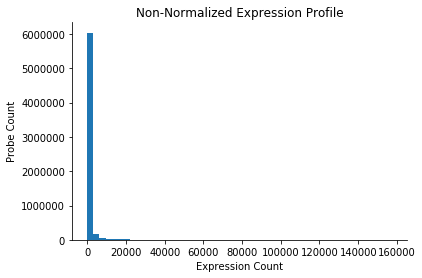

In [24]:
#a) Plot a histogram (x-axis: expression levels, y-axis: probe counts) of the complete dataset. 
#Describe the distribution—what is the overall shape? Replace any values <= 0 with a value of 1, 
#and log-transform (log 10) the entire data matrix. Plot the log- transformed data.

df1 = df.drop(0) #temporarily get rid of relapse column
df1 = df1.drop('Gene', axis = 1)
df1 = df1.drop('Probe', axis = 1)
df2 = df1.stack()
x = df2.hist(grid = False, bins=50)
x.set_title('Non-Normalized Expression Profile')
x.set_xlabel('Expression Count')
x.set_ylabel('Probe Count')
x.spines['top'].set_visible(False)
x.spines['right'].set_visible(False)

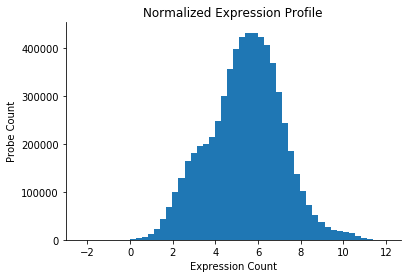

In [23]:
df3 = df2.copy()
df3 = np.log(df3)
y = df3.hist(grid = False, bins=50)
y.set_title('Normalized Expression Profile')
y.set_xlabel('Expression Count')
y.set_ylabel('Probe Count')
y.spines['top'].set_visible(False)
y.spines['right'].set_visible(False)

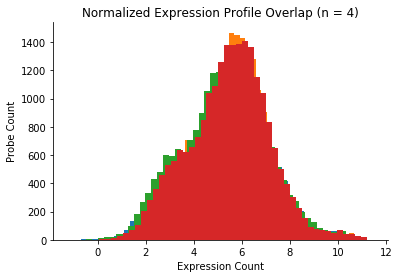

In [17]:
#(b) Plot individual histograms of the log-transformed data for the first four arrays (GSM36777-GSM36780).
#How do the distributions compare from sample to sample?

series1 = np.log(pd.Series(df1['GSM36777']))
series2 = np.log(pd.Series(df1['GSM36778']))
series3 = np.log(pd.Series(df1['GSM36779']))
series4 = np.log(pd.Series(df1['GSM36780']))

series_list = [series1, series2, series3, series4]

for i in series_list:
    z = i.hist(grid = False, bins=50)
    z.set_title('Normalized Expression Profile Overlap (n = 4)')
    z.set_xlabel('Expression Count')
    z.set_ylabel('Probe Count')
    z.spines['top'].set_visible(False)
    z.spines['right'].set_visible(False)

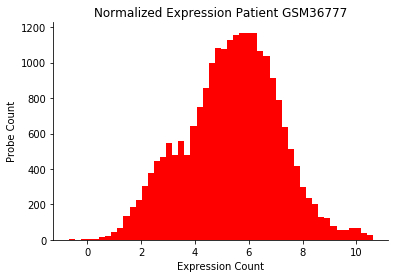

In [18]:
z = series1.hist(grid = False, bins=50, color = 'red')
z.set_title('Normalized Expression Patient GSM36777')
z.set_xlabel('Expression Count')
z.set_ylabel('Probe Count')
z.spines['top'].set_visible(False)
z.spines['right'].set_visible(False)

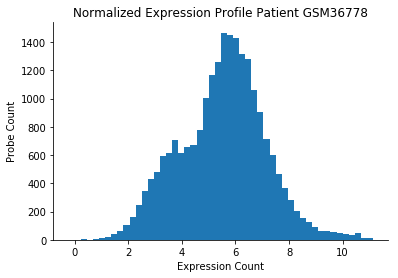

In [19]:
z = series2.hist(grid = False, bins=50)
z.set_title('Normalized Expression Profile Patient GSM36778')
z.set_xlabel('Expression Count')
z.set_ylabel('Probe Count')
z.spines['top'].set_visible(False)
z.spines['right'].set_visible(False)

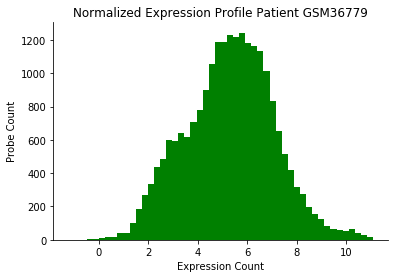

In [20]:
z = series3.hist(grid = False, bins=50, color = 'green')
z.set_title('Normalized Expression Profile Patient GSM36779')
z.set_xlabel('Expression Count')
z.set_ylabel('Probe Count')
z.spines['top'].set_visible(False)
z.spines['right'].set_visible(False)

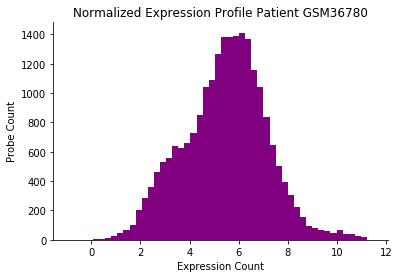

In [21]:
z = series4.hist(grid = False, bins=50, color = 'purple')
z.set_title('Normalized Expression Profile Patient GSM36780')
z.set_xlabel('Expression Count')
z.set_ylabel('Probe Count')
z.spines['top'].set_visible(False)
z.spines['right'].set_visible(False)

In [26]:
#c) Perform quantile normalization on your log-transformed data (from part b) across all arrays (samples) 
#such that each has the same empirical distribution. Use the mean of each probe across all samples as 
#the reference distribution for this normalization. Plot a histogram of the normalized data for each 
#of the first four samples (GSM36777- GSM36780). Use the normalized data for the remaining problems.

df_small = df[['Probe', 'Gene', 'GSM36777', 'GSM36778', 'GSM36779', 'GSM36780']]
df_small

,Probe,Gene,GSM36777,GSM36778,GSM36779,GSM36780
0,Relapse,NaN,0.0,1.0,0.0,0.0
1,1007_s_at,DDR1,3848.1,6520.9,5285.7,4043.7
2,1053_at,RFC2,228.9,112.5,178.4,398.7
3,117_at,HSPA6,213.1,189.8,269.7,312.4
4,121_at,PAX8,1009.4,2083.3,1203.4,1104.4
5,1255_g_at,GUCA1A,31.8,145.8,42.5,108.2
6,1294_at,UBA7,551.5,802.8,557.5,568.5
7,1316_at,THRA,176.7,278.4,183.3,187.7
8,1320_at,PTPN21,11.9,28.3,56.4,42.1
9,1405_i_at,CCL5,309.3,449.0,101.9,899.1
